# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Sep 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('clean_busi_rev_joint.csv')

In [4]:
df.head(5)

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [3]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents=df['text']

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [4]:
# Make a column and take the values, save to a variable named "target"
df['target']=[1 if element > 4 else 0 for element in df['stars']]
target=df['target']
print(sum(target),len(target))

237791 488769


#### You may want to look at the statistic of the target variable

In [5]:
# To be implemented
target.describe()

count    488769.000000
mean          0.486510
std           0.499818
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

### Create training dataset and test dataset

In [6]:
from sklearn.cross_validation import train_test_split

C:\Users\jenny\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, test_size=0.4, random_state=0)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [32]:
# Train the model with your training data
vectors = vectorizer.fit_transform(documents_train).toarray()
words = vectorizer.get_feature_names()

In [10]:
# Use the trained model to transform all the reviews
y_test = target_test
X_test = vectorizer.transform(documents_test)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [33]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [ ]:
# To be implemented
pass

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [23]:
# To be implemented
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.00282594 0.00878418 0.00140923 ... 0.00145813 0.00532753 0.00858085]
 [0.00180161 0.00548343 0.00168832 ... 0.0010599  0.00279757 0.00544064]
 [0.00177705 0.00691144 0.00234068 ... 0.00094744 0.00278159 0.00641676]
 ...
 [0.00348267 0.00802612 0.00239316 ... 0.00078401 0.00326765 0.00671037]
 [0.0028125  0.00762342 0.00153054 ... 0.00134209 0.00203437 0.00706323]
 [0.0046207  0.02019188 0.00262954 ... 0.00348579 0.00078568 0.00167015]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [35]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num_, centroid_ in enumerate(top_centroids):
    print("%d: %s" % (num_, ", ".join(words[i] for i in centroid_)))

top features for each cluster:
0: chicken, good, fried, food, rice, ordered, place, sauce, great, like
1: amazing, food, place, service, great, best, definitely, vegas, delicious, love
2: sushi, rolls, place, roll, ayce, good, great, fresh, service, fish
3: food, order, time, service, minutes, just, came, didn, got, asked
4: good, food, place, vegas, service, like, best, delicious, really, just
5: burger, fries, burgers, good, cheese, place, shake, food, great, ordered
6: pizza, crust, good, place, great, cheese, slice, best, just, order
7: great, food, service, place, good, friendly, staff, awesome, love, definitely


#### Try different k
If you set k == to a different number, how does the top features change?

In [36]:
# To be implemented
from collections import Counter
kmeans = KMeans(n_clusters=4)
kmeans.fit(vectors)
assigned_cluster = kmeans.transform(vectors).argmin(axis=1)
print("top 2 topics for each cluster")
for ii in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors.shape[0])[assigned_cluster==ii]
    topics = df.loc[cluster].dropna()['text']
    most_common = Counter(topics).most_common()
    if len(most_common) > 1:
        print("Cluster %d: %s" % (ii, most_common[0][0]),", %s" % (most_common[1][0]))


top 2 topics for each cluster
Cluster 0: Food was good, but the customer service I received was OUTSTANDING!!! I will post a pic of her & I don't even usually leave ratings but she was exceptional and deserves recognition & praise! Thank you very much you are awesome!!! , First time eating here and the cashier was very helpful, super friendly & had a very positive attitude. She made me feel very welcome for my first time being here. Excellent customer service, delicious food & we didn't wait that long for our food. This place is a must try. We will definitely be back to try the other menu items.
Cluster 1: Went here for guys weekend. Unbelievable. Ravioli app was so good. The steak was very good too. When getting a good bottle of wine, make sure they decant it for you...had to ask. , Had the chateau Breon and pride mountain Cabernet for dinner....wow! That was absolutely delicious food.  The tables were a little cramped and loud but still worth the trip. Pricey but still worth it.
Clus

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [37]:
print("a sample review")
for j in range(kmeans.n_clusters):
    cluster_1 = np.arange(0, vectors.shape[0])[assigned_cluster==j]
    topics_1 = df.loc[cluster_1]['text']
    sample_review = topics_1[topics_1.index[3]]
    print('Cluster', j,'sample review is',sample_review,'The rating is',df['stars'][topics_1.index[3]])

a sample review
Cluster 0 sample review is The most amazing French onion soup I've ever had!  Really, the food was delicious. Wonderful service.  Only complaint was the ambience.   The decor is "modern vacant". Completely devoid of artistry.   The food makes up for the absence of decor The rating is 5
Cluster 1 sample review is So I realize this is a steakhouse... but I ordered the Chilean Sea Bass.  and I don't regret it. Very moist fish with a yummy fennel salad and fingerling potatoes. I would probably order this again were it not for the fact that I would want to try more of everything else.

The staff was very good. Courteous. Dressed impeccably  well and very organized. The restaurant itself feels like you're in a private cellar. Linen cloths were very clean and pressed and there is nothing else to distract from the mood set by the place... definitely nothing to distract from the food.

The only reason for the deduction in a star is because I could not get comfortable. While I lo

In [67]:
# To be implemented
topics[topics.index[0]]

"Went for a nice anniversary dinner. Researched a lot of steakhouses and thought this was reasonably priced (compared to others) for Vegas so thought we'd give it a shot. made reservations but was not crowded on a Monday night. We split the bbq shrimp which were very good for an appetizer. Then we each had salads. I ordered the filet mignon which was a small 6oz serving for $50. I could've easily eaten 2 of them. But the steak was very tender and nicely seasoned. Husband had the bone in ribeye which is what they are known for. He enjoyed it. We split the mashed potatoes which were very good, but kinda hard to screw those up. We each had 1 drink and the bill was $200. Service was good. They give you nice warm rolls which were tasty. We would go back, but we like trying new places and it will probably be a few years before we go back to Vegas anyways."

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [38]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
review_count=df[['text','business_id']].groupby(df['business_id']).count()

In [39]:
max_count=review_count['text'].max()
top_restaurant_id=review_count[review_count['text']==max_count].index[0]
type(top_restaurant_id)
df_top_restaurant=df[df['business_id']==top_restaurant_id]
df_top_restaurant

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,target
215088,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A,1
215089,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q,0
215090,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA,0
215091,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2017-09-22,0,SOUuNn4f1fHKxFHntYzonw,3,Was torn between 2 and 3. Caught the last of ...,0,WvVqnHU_eVBUfL-CI9efdw,0
215092,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2016-12-14,0,1mAf8vTO6TGTrQ3WSfTB3g,4,This place was one of those once in a lifetime...,0,aYLS5lhdCp5HSPOtkMvapw,0
215093,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2016-06-01,0,q0r0GrGs4D0JSwCA62138w,5,Waited about an hour in line. \r\nFeels like a...,0,2dMTx3eEdNvw2o34V5pHew,1
215094,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2016-01-16,0,7bOPIQC6tTrmTFdlYUXtuA,1,Eggs Benedict was bland. No flavor what so ev...,0,Lk-jE5WsnRopJLnVTpTCcA,0
215095,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2017-06-18,0,nnmcNHGLa6TTZ4KP7ZrU7A,1,"Food is subpar. There's a line to get to pay, ...",0,KIbfAG_JrTEPt6aQXcnQJg,0
215096,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2016-03-13,0,oQ6eVYyeTUKwycl2wIadUQ,4,Amazing selections -- Good for a sea food lover,0,-EVdaQWBxUhroURI8wMWVg,0
215097,RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,Bacchanal Buffet,7866,4.0,0,2016-03-14,0,_1aU5ba_I8hKefJYIDOB9A,4,All I have to say is GET THERE EARLY so you do...,0,mttyWYBvO3X00c00KhnHrw,0


We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [40]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
doc_top_restaurant=df[df['business_id']==top_restaurant_id]['text']
top_restaurant_vec=vectorizer.transform(doc_top_restaurant).toarray()

In [58]:
doc_top_restaurant

215088    This buffet is amazing.  Yes, it is expensive,...
215089    This place....lol our server was nice.  But fo...
215090    One star knocked off for the cold air conditio...
215091    Was torn between 2 and 3.  Caught the last of ...
215092    This place was one of those once in a lifetime...
215093    Waited about an hour in line. \r\nFeels like a...
215094    Eggs Benedict was bland.  No flavor what so ev...
215095    Food is subpar. There's a line to get to pay, ...
215096      Amazing selections -- Good for a sea food lover
215097    All I have to say is GET THERE EARLY so you do...
215098    Poor food quality high price and try to scam u...
215099    This buffet was amazing! It was a bit pricey, ...
215100    The lines are too long and they manage the lin...
215101    This is my favorite buffet in LV. There is so ...
215102    Pricey but worth it. Great variety.  They give...
215103    I'm staying at Caesar's Palace for 4th of July...
215104    This is the most popular buffe

In [41]:
kmeans_top_restaurant=KMeans()
kmeans_top_restaurant.fit(top_restaurant_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
top_centroids = kmeans_top_restaurant.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for k in centroid)))

top features for each cluster:
0: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
1: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
2: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
3: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
4: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
5: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
6: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18
7: 18, 18, 18, 18, 18, 18, 18, 18, 18, 18


In [43]:
kmeans_top_restaurant = KMeans(n_clusters=5)
kmeans_top_restaurant.fit(top_restaurant_vec)
assigned_cluster = kmeans_top_restaurant.transform(top_restaurant_vec).argmin(axis=1)
pass
print("top 2 topics for each cluster")
for ik in range(kmeans_top_restaurant.n_clusters):
    cluster = np.arange(0, top_restaurant_vec.shape[0])[assigned_cluster==ik]
    topics = df.loc[cluster].dropna()['text']
    most_common = Counter(topics).most_common()
    if len(most_common) > 1:
        print("Cluster %d: %s" % (ik, most_common[0][0]),", %s" % (most_common[1][0]))


top 2 topics for each cluster
Cluster 0: This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return. , My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.
As we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a manager. He even checked with the chef to make sure the complimentary popover was okay for us to consume. We told them we are allergic to soy, corn, peanut, tomato and pork products, and some other stuff, and he had been very mindful and a

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [44]:
doc_vec = vectorizer.fit_transform(documents).toarray()
doc_vec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09279124]])

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(doc_vec)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.4, random_state=0)

### Use PCA to transform data (train and test) and get princial components

In [47]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

#n_col = X_train.shape[1]

pca = PCA(n_components)

train_components = pca.fit_transform(X_train)# fit: get V, lambda; transform: X_train*V
test_components = pca.transform(X_test)



### See how much (and how much percentage of) variance the principal components explain

In [48]:
pca

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# To be implemented
print(pca.explained_variance_.shape)
print(pca.explained_variance_)

(50,)
[5.47866082 4.33487875 3.29962477 2.86127036 2.713392   2.64359659
 2.51255957 2.42695018 2.30245156 2.27343835 2.24747177 2.11795925
 2.11135209 2.03025973 1.98357024 1.97811489 1.93578489 1.89393084
 1.84708476 1.83836729 1.81493944 1.7750472  1.75876682 1.72945564
 1.67553658 1.64641774 1.63032999 1.60795696 1.59945899 1.57978072
 1.55966499 1.54851455 1.52578463 1.51724343 1.51394698 1.49521137
 1.48130565 1.45949018 1.45698606 1.45442234 1.4195827  1.41104146
 1.40247936 1.38091131 1.36854353 1.36372875 1.34961409 1.32965733
 1.32565408 1.31283048]


In [33]:
# To be implemented
print(pca.components_.shape)
print(pca.components_)

(50, 1000)
[[ 0.02996008  0.06812111  0.01251879 ...  0.02959975 -0.01800585
  -0.03232129]
 [ 0.0045152  -0.01983551 -0.00095105 ... -0.01674716  0.02353496
   0.01861537]
 [-0.00587275 -0.00548086  0.00632699 ... -0.00571204 -0.01126539
  -0.00527269]
 ...
 [-0.00397576  0.00687995  0.00506003 ... -0.0133603   0.01825505
   0.02061582]
 [-0.00755218  0.00306932  0.00789263 ... -0.02199107  0.0024903
   0.0164544 ]
 [-0.0025966  -0.00935497  0.03377193 ...  0.02023786  0.00513159
   0.01342954]]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [87]:
# To be implemented
pca.components_.T.dot(pca.components_)

array([[ 3.78291623e-02,  1.76983554e-02,  1.10912763e-02, ...,
        -8.16954674e-04, -1.78908338e-03, -5.45642523e-03],
       [ 1.76983554e-02,  4.42485698e-02,  4.04480571e-03, ...,
        -1.50990738e-04,  1.41033114e-03, -3.38740647e-05],
       [ 1.10912763e-02,  4.04480571e-03,  8.58395137e-03, ...,
        -3.52906863e-03, -2.38176047e-03, -3.73192107e-03],
       ...,
       [-8.16954674e-04, -1.50990738e-04, -3.52906863e-03, ...,
         2.87873718e-02,  3.69128631e-03, -1.94578542e-03],
       [-1.78908338e-03,  1.41033114e-03, -2.38176047e-03, ...,
         3.69128631e-03,  1.33463087e-02,  4.64877528e-03],
       [-5.45642523e-03, -3.38740647e-05, -3.73192107e-03, ...,
        -1.94578542e-03,  4.64877528e-03,  1.59737864e-02]])

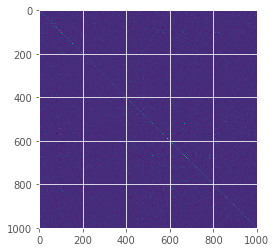

In [49]:
plt.imshow(np.cov(pca.components_.T))
plt.show()

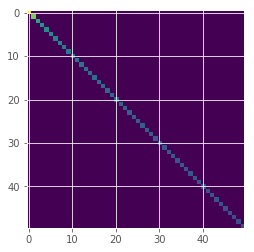

In [50]:
plt.imshow(np.cov(train_components.T))
plt.show()

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [51]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_1=LogisticRegression()
model_1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Get score for training set
model_1.score(X_train,y_train)

0.8258786541681301

In [53]:
# Get score for test set
model_1.score(X_test,y_test)

0.8231683613969761

#### Use (Stardardized + PCA) tf-idf vectors as features

In [56]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression
model_2=LogisticRegression()
model_2.fit(train_components,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# Get score for training set
model_2.score(train_components,y_train)

0.8079833322535216

In [44]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_2.score(test_components,y_test)

0.8069490762526341

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: The Non_PCA results a higher training score because it used the full set of training information, PCA component makes the training much faster than non_PCA method

#### You can plot the coefficients against principal components


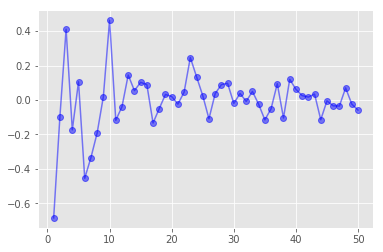

In [60]:
# To be implemented
pca_range = np.arange(n_components) + 1
#coeff=model_2.coef_
plt.plot(pca_range, model_2.coef_[0], marker='o', color='b', alpha=.5, label='train mse')

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [61]:
# Build a Random Forest Classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=10, random_state=1)
model_3= OneVsRestClassifier(estimator,n_jobs=-1)
model_3.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=-1)

In [62]:
# Get score for training set
model_3.score(X_train,y_train)

0.8022785164068867

In [63]:
# Get score for test set
model_3.score(X_test,y_test)

0.7892515907277452

#### Use (Stardardized + PCA) tf-idf vectors as features

In [64]:
# Build a Random Forest Classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=10, random_state=1)
model_3= OneVsRestClassifier(estimator,n_jobs=-1)
model_3.fit(train_components,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=-1)

In [65]:
# Get score for training set
model_3.score(train_components,y_train)

0.9028544538823778

In [50]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_3.score(test_components,y_test)

0.7982128608547988

#### Q: What do you see from the training result and the test result?

A: overfitting

#### You can plot the feature importances against principal components


In [15]:
# To be implemented
import copy
from numpy.linalg import eigh

# fit
cov_train = np.cov(train_components.T)
lambdas, v = eigh(cov_train)

# eigh order lambda from small to large, so flip
lambdas = lambdas[::-1]
v = -np.flip(v,axis=1)

print(lambdas.shape)
print(v.shape)

(50,)
(50, 50)


Text(0,0.5,'Variance Explained')

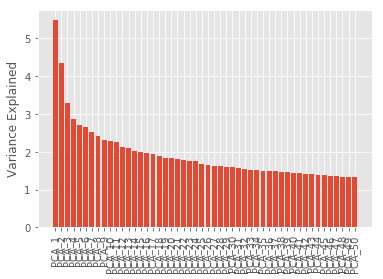

In [16]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

Text(0,0.5,'Proportion of Variance Explained')

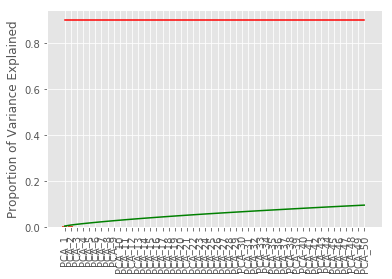

In [96]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_ratio_, align='center')
plt.plot(pca_range, np.cumsum(pca.explained_variance_ratio_), 'g-')
plt.plot(pca_range, 0.9*np.ones(len(pca_range)), 'r-')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Proportion of Variance Explained')

### use logistic regression as example

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

train_mse_arr = np.array([])
test_mse_arr = np.array([])

for i in pca_range:

    train_subset = train_components[:, :i]

    pca_log = LogisticRegression()

    pca_log.fit(train_subset, y_train)

    # Get train error
    train_mse = cross_val_score(pca_log, train_subset, y=y_train,
                                scoring='neg_mean_squared_error', cv=5) * -1
    train_mse_arr = np.append(train_mse_arr, train_mse.mean())
    
    # Get test error
    test_set = test_components[:, :i]
    test_mse = mean_squared_error(pca_log.predict(test_set), y_test)
    test_mse_arr = np.append(test_mse_arr, test_mse)

# of PCs that gives lowest train MSE: 50 @ 0.1920780700838852


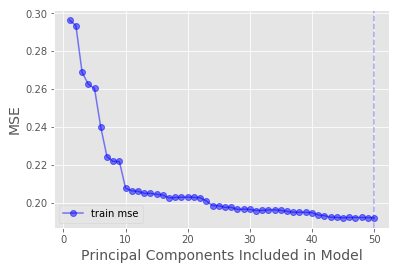

In [18]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_train_mse_pca, min_train_mse = np.argmin(train_mse_arr) + 1, np.min(train_mse_arr)

plt.axvline(best_train_mse_pca, color='b', ls='--', alpha=.3)

print('# of PCs that gives lowest train MSE:', best_train_mse_pca, '@', min_train_mse)

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [19]:
categories=df['categories']
cate_train, cate_test, cat_tar_train, cat_tar_test = train_test_split(categories, target, test_size=0.4, random_state=0)

In [20]:
cate_train_vec=vectorizer.transform(cate_train).toarray()

from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.fit(cate_train_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: italian, restaurants, pizza, wine, sandwiches, seafood, cocktail, salad, food, wings
1: american, traditional, restaurants, brunch, burgers, breakfast, new, sandwiches, food, seafood
2: japanese, restaurants, sushi, asian, ramen, noodles, seafood, plates, korean, hawaiian
3: mexican, restaurants, tacos, fast, food, cocktail, seafood, vegan, desserts, vegetarian
4: brunch, restaurants, breakfast, sandwiches, buffets, food, tea, coffee, french, mexican
5: chinese, restaurants, asian, sum, dim, noodles, seafood, thai, japanese, food
6: american, restaurants, new, brunch, breakfast, cocktail, burgers, mexican, food, seafood
7: restaurants, food, seafood, sandwiches, pizza, burgers, thai, fast, tea, desserts


## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [29]:
from collections import Counter
assigned_cluster = kmeans.transform(cate_train_vec).argmin(axis=1)
print("best restaurant for each cluster")
for k in range(kmeans.n_clusters):
    cluster_res = np.arange(0, cate_train_vec.shape[0])[assigned_cluster==k]
    print(cluster_res)
    res_cate = df.loc[cluster_res]['categories']
    print(res_cate)
    most_common = Counter(res_cate).most_common()
    if len(most_common) > 1:
        print("Cluster %d: %s" % (k, most_common[0][0]))


best restaurant for each cluster
[     0     50     57 ... 293206 293236 293257]
0                    Steakhouses, Restaurants, Cajun/Creole
50                   Steakhouses, Restaurants, Cajun/Creole
57                   Steakhouses, Restaurants, Cajun/Creole
85                   Steakhouses, Restaurants, Cajun/Creole
86                   Steakhouses, Restaurants, Cajun/Creole
94                   Steakhouses, Restaurants, Cajun/Creole
101                  Steakhouses, Restaurants, Cajun/Creole
103                  Steakhouses, Restaurants, Cajun/Creole
111                  Steakhouses, Restaurants, Cajun/Creole
115                  Steakhouses, Restaurants, Cajun/Creole
119                  Steakhouses, Restaurants, Cajun/Creole
127                  Steakhouses, Restaurants, Cajun/Creole
149                  Steakhouses, Restaurants, Cajun/Creole
157                  Steakhouses, Restaurants, Cajun/Creole
159                  Steakhouses, Restaurants, Cajun/Creole
169                

Name: categories, Length: 40248, dtype: object
Cluster 6: Sandwiches, Buffets, Breakfast & Brunch, Food, Restaurants
[     1      5      6 ... 293241 293242 293256]
1                    Steakhouses, Restaurants, Cajun/Creole
5                    Steakhouses, Restaurants, Cajun/Creole
6                    Steakhouses, Restaurants, Cajun/Creole
9                    Steakhouses, Restaurants, Cajun/Creole
11                   Steakhouses, Restaurants, Cajun/Creole
15                   Steakhouses, Restaurants, Cajun/Creole
16                   Steakhouses, Restaurants, Cajun/Creole
19                   Steakhouses, Restaurants, Cajun/Creole
24                   Steakhouses, Restaurants, Cajun/Creole
27                   Steakhouses, Restaurants, Cajun/Creole
31                   Steakhouses, Restaurants, Cajun/Creole
34                   Steakhouses, Restaurants, Cajun/Creole
36                   Steakhouses, Restaurants, Cajun/Creole
40                   Steakhouses, Restaurants, Cajun/Cr

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented